# **About Bellabeat**
Bellabeat is a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market.

# **Analysis Questions**
I have been asked to analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices. I am to select one Bellabeat product to apply these insights. The questions I will use to guide my analysis are:

* 1. What are some trends in smart device usage?
* 2. How could these trends apply to Bellabeat customers?
* 3. How could these trends help influence Bellabeat marketing   strategy? 


# **Getting Down to Business (Task)**
Use the data to identify opportunities for growth and recommendations for the Bellabeat marketing team to improve engagement and reach.

# **Load Packages from Library**

In [1]:
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# **Import Datasets**
I used public data to explore smart device users’ daily habits. I was assigned a specific data set: FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius)

In [2]:
activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
calories <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
intensity_day <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
sleep <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
intensity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")

This is a Kaggle data set from Fitbit users who consented to the submission of personal tracker data. This includes minute-level data for physical activity, heart rate, and sleep monitoring. After using the view() function, I discovered some formatting issues with the date and time columns. For ease of further analysis, I converted the datatype from character to datetime formats. Then I split them by date and time.

In [3]:
# intensity format
intensity$ActivityHour=as.POSIXct(intensity$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
intensity$time <- format(intensity$ActivityHour, format = "%H:%M:%S")
intensity$date <- format(intensity$ActivityHour, format = "%m/%d/%y")
# calories format
calories$ActivityDay=as.POSIXct(calories$ActivityDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
# activity format
activity$ActivityDate=as.POSIXct(activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
activity$date <- format(activity$ActivityDate, format = "%m/%d/%y")
# sleep format
sleep$SleepDay=as.POSIXct(sleep$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep$date <- format(sleep$SleepDay, format = "%m/%d/%y")

Once the datasets had been imported and formatted, I began generating summary tables to get a sense of the data I was working with.

# **Summary and Analysis of Data**

To determine the sample sizes for the datasets, I ran the distinct() function on the Id column and determined there were between 30-34 participants in each dataset (excluding the weightloginfo). There were a total of 8 participants in the latter which is not a large enough sample to make any useful conclusions.  

In [4]:
#determine the number of participants in each dataset 
n_distinct(activity$Id)
n_distinct(sleep$Id)
n_distinct(calories$Id)
n_distinct(intensity$Id)

[1] 33

[1] 24

[1] 33

[1] 33

In [5]:
#run summaries on various datasets to gain high-level information

#breakdown of activity minutes per category
activity %>% 
  select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, Calories) %>% 
  summary()

#summary of sleep table
sleep %>% 
  select(TotalSleepRecords, TotalTimeInBed, TotalMinutesAsleep) %>% 
  summary()

# calorie table
calories %>%
  select(Calories) %>%
  summary()


 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes SedentaryMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0        Min.   :   0.0  
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0        1st Qu.: 729.8  
 Median :  4.00    Median :  6.00      Median :199.0        Median :1057.5  
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8        Mean   : 991.2  
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0        3rd Qu.:1229.5  
 Max.   :210.00    Max.   :143.00      Max.   :518.0        Max.   :1440.0  
    Calories   
 Min.   :   0  
 1st Qu.:1828  
 Median :2134  
 Mean   :2304  
 3rd Qu.:2793  
 Max.   :4900  

 TotalSleepRecords TotalTimeInBed  TotalMinutesAsleep
 Min.   :1.000     Min.   : 61.0   Min.   : 58.0     
 1st Qu.:1.000     1st Qu.:403.0   1st Qu.:361.0     
 Median :1.000     Median :463.0   Median :433.0     
 Mean   :1.119     Mean   :458.6   Mean   :419.5     
 3rd Qu.:1.000     3rd Qu.:526.0   3rd Qu.:490.0     
 Max.   :3.000     Max.   :961.0   Max.   :796.0     

    Calories   
 Min.   :   0  
 1st Qu.:1828  
 Median :2134  
 Mean   :2304  
 3rd Qu.:2793  
 Max.   :4900  

# **Insights From Summary Tables**

* The average sedentary time is 991 minutes, a whopping 16 hours! 
* The majority of participants were lightly active at mean of 192 minutes.
* Participants slept approximately 7.2 hours. 93% of the time while the participant was in bed they were asleep. 
* Participants averaged approximately 2300 calories burned daily during this month. 
* Most participants averaged around 7400 steps per day, well below healthy averages.



# **They Call Me Mr. Whiskers**

I was curious if activity level affected sleep. In order to discover if any correlation existed, I chose to merge the activity and sleep dataframes. The merge() function automatically defaults to innerjoin; the type of join I wanted to use.

In [6]:
#merging dataframes for analysis
sleep_activity_merge <- merge(sleep, activity, by=c('Id', 'date'))

# **Let's Get Visual!**

Let's look at the relationship between Total Minutes Asleep and Sedentry Minutes.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


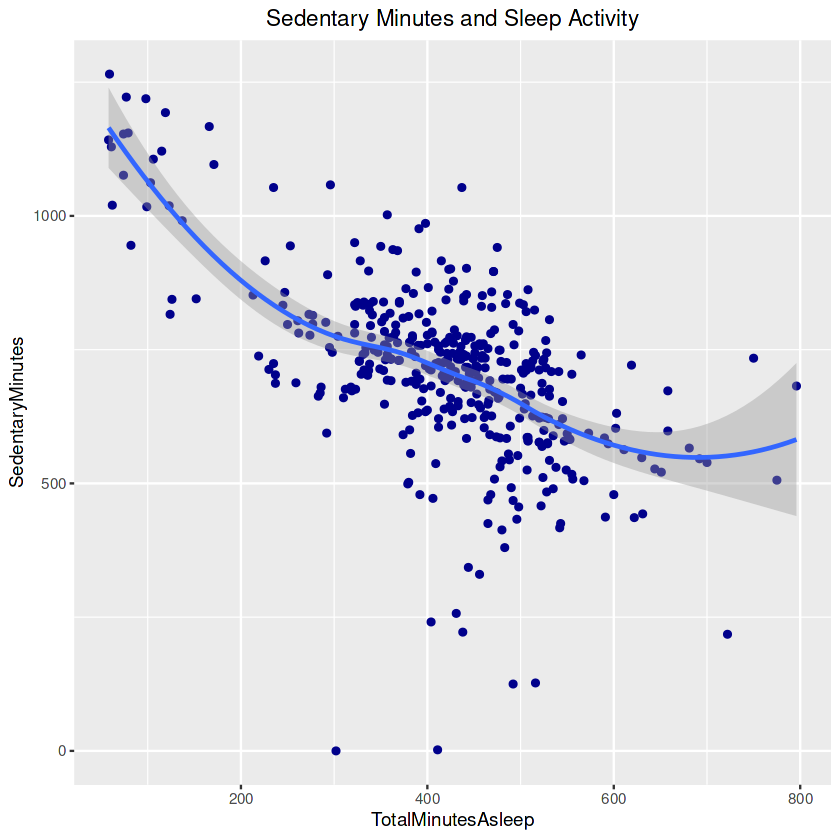

In [7]:
#plotting sedentary time with sleep
ggplot(data=sleep_activity_merge, aes(x=TotalMinutesAsleep, y=SedentaryMinutes)) + 
  geom_point(color='darkblue') + geom_smooth() +
  labs(title="Sedentary Minutes and Sleep Activity")+
  theme(plot.title = element_text(hjust=0.5))

It looks like being curious like a cat paid off! There is a negative relationship between Sedentary Minutes and Sleep time. According to the NIH, prolonged sedentary behavior tends to be associated with an elevated risk of insomnia and sleep disturbance. Our data seems to confirm that causation.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


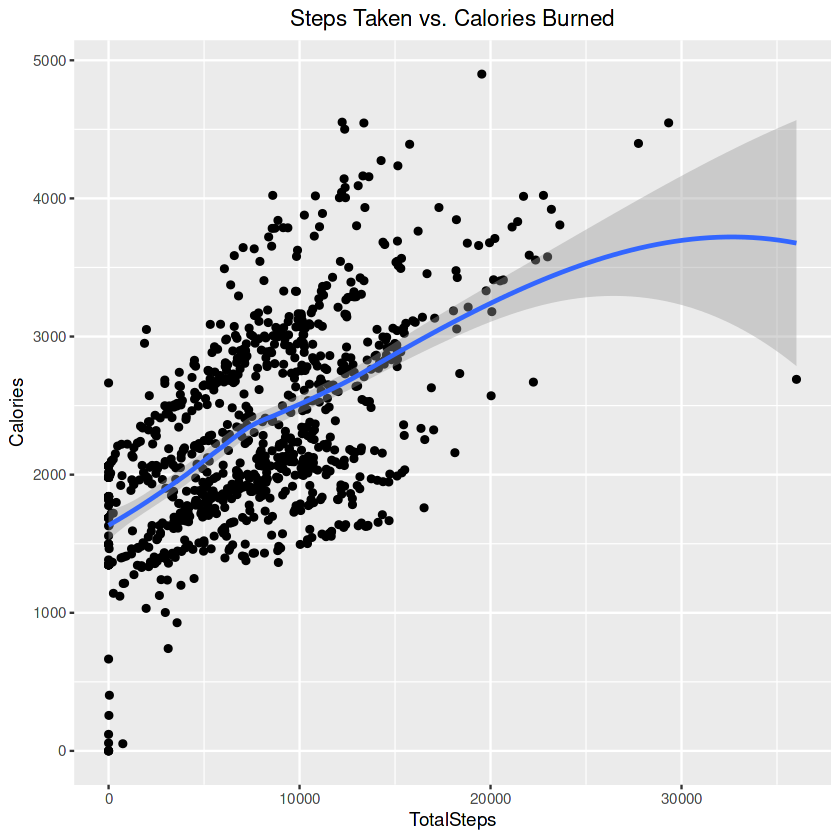

In [8]:
#visualize steps vs calorie count
ggplot(data=activity, aes(x=TotalSteps, y=Calories)) + 
  geom_point() + geom_smooth() + labs(title="Steps Taken vs. Calories Burned")+
  theme(plot.title = element_text(hjust=0.5))

This is a somewhat obvious correlation. The more you move the more calories are burned!

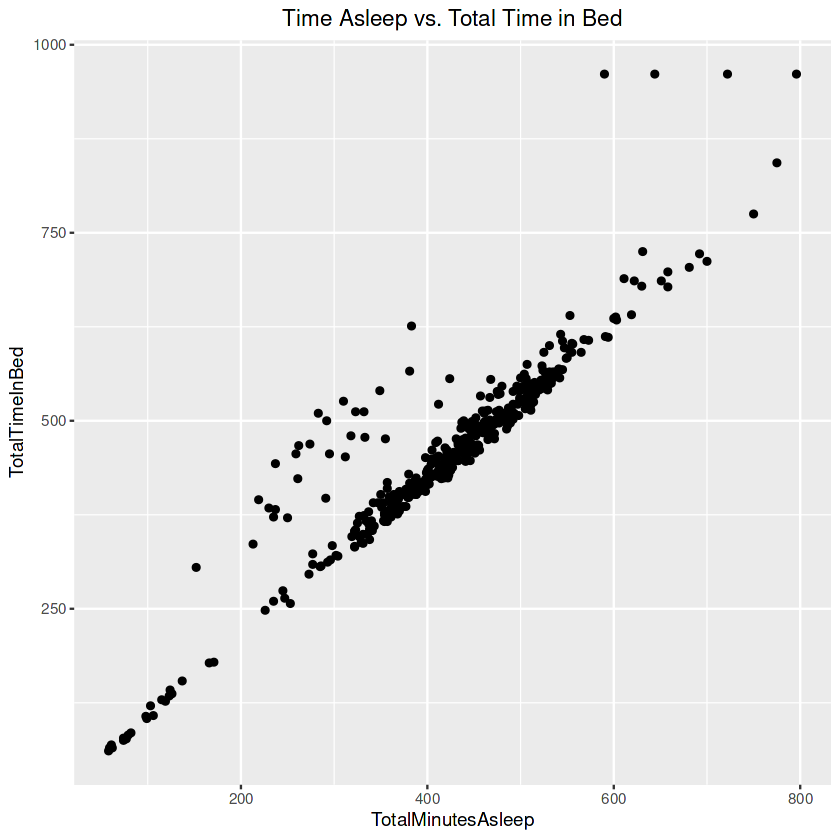

In [9]:
#visualize time in bed vs. time asleep
ggplot(data=sleep, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + 
  geom_point()+ labs(title="Time Asleep vs. Total Time in Bed")+
  theme(plot.title = element_text(hjust=0.5))

There seems to be a positive correlation between time spent in bed and total minutes asleep. In other words, if you want to sleep more, get into bed!

# **Keeping Curious**

Since we know the majority of the day is spent sedentary, I wanted to discover the times of day participants were most active. Plotting the hours of day vs. intensity first requires creating a new dataframe with the mean values for each hour of the day.

Warning message in geom_histogram(stat = "identity", fill = "darkblue"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


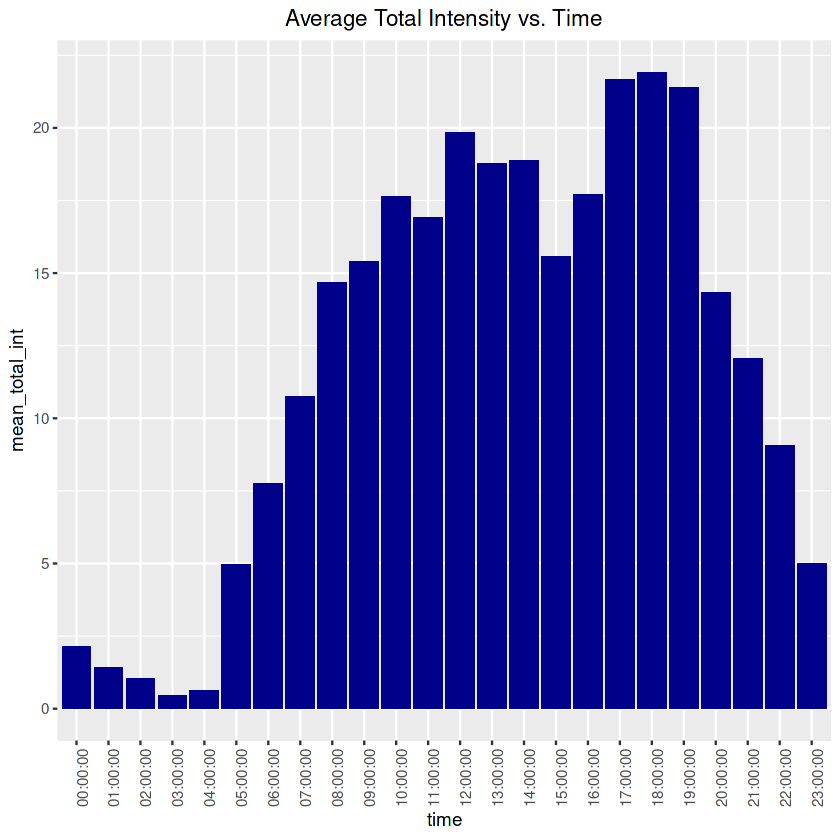

In [10]:
#create a new dataframe
int_new <- intensity %>%
  group_by(time) %>%
  drop_na() %>%
  summarise(mean_total_int = mean(TotalIntensity))

#plot the new dataframe with mean operator
ggplot(data=int_new, aes(x=time, y=mean_total_int)) + geom_histogram(stat = "identity", fill='darkblue') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Average Total Intensity vs. Time")+
  theme(plot.title = element_text(hjust=0.5))

* After visualizing intensity levels by hour, I found people are typically active between 5 am and 10pm.
* However, most activity happens between 5 pm and 7 pm. This would correspond to the times most people get out of work.

If you work for a company like Bellabeat, you understand the importance of staying active for overall health. My final visualization illustrates the overhwhelming amount of time participants spend sedentary. Research by the Mayo Clinic has linked sitting for long periods with a whole host of health issues. This is an effective visual to motivate and inspire the team to create solutions.

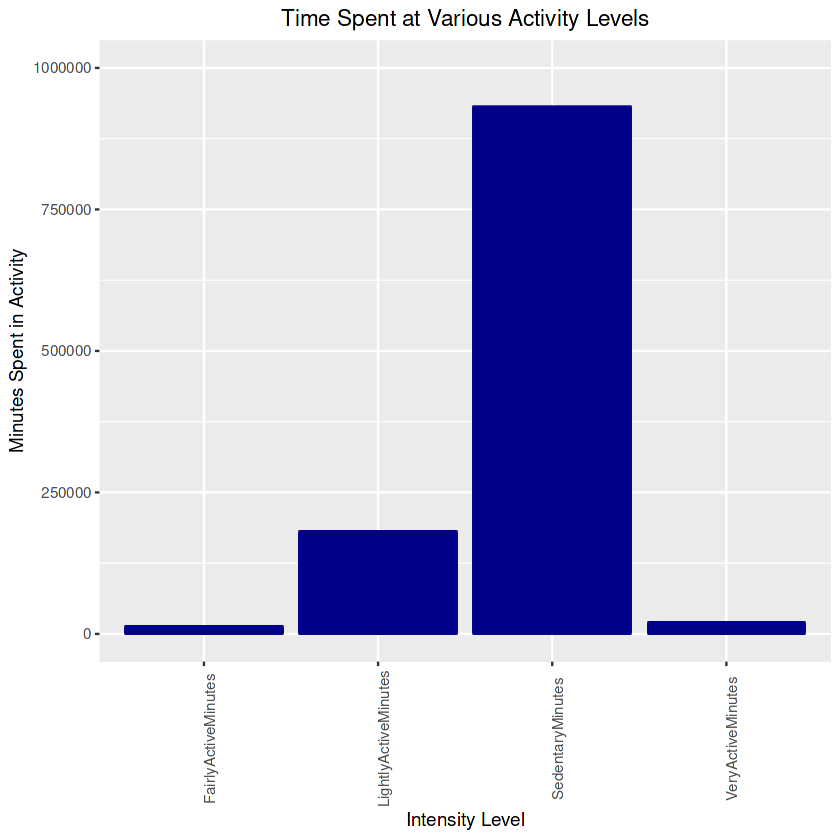

In [11]:
tidyr::pivot_longer(activity, cols = VeryActiveMinutes:SedentaryMinutes) %>%
  ggplot() +
  geom_bar(aes(x = name, y = value), stat = "identity", color='darkblue')+
  coord_cartesian(ylim = c(1000, 999000))+
  theme(axis.text.x = element_text(angle = 90)) +
  xlab("Intensity Level")+ 
  ylab("Minutes Spent in Activity")+
  labs(title = "Time Spent at Various Activity Levels")+
  theme(plot.title = element_text(hjust=0.5))

# **Summary of Business Task**

I was given numerous datasets to work on for this project. By organizing and analyzing sleep habits, activity intensity and calorie count, I can make some high-level recommendations to both increase product engagement and drive future growth.

# **Recommendations From Analysis**

**Gamefication**
'Gamefication' is a growing trend where a company adds games, or game-like elements in an environment to encourage participation. 
1. We can create and market an online community of “Bellas”—a place where women can gather, upload activity data to a virtual scoreboard, and encourage each other to move! 
1. Women can compete for badges, special discounts on future products, and social media “shout outs” for top contributors. 
1. Metrics used in this community can include: frequency of posting(streaks), activities logged and engagement with other, 'Bellas'.


**Push Notifications** 
Notifications are an excellent way of harnessing tracking data to increase a participant’s awareness of their health throughout the day. I have a few suggestions utilizing notifications to keep people engaged.

1. Average total steps per day are 7638. This is below the CDC recommendation of 8,000 steps. The CDC found that taking 8,000 steps per day was associated with a 51% lower risk of death overall. We can create push notifications to alert people when they have been inactive for too long and encourage them to get up and move.
1. Average sedentary time is 16 hours. Activity notifications can include facts about the damaging effects of a sedentary life like obesity, increased blood pressure, excess body fat and unhealthy cholesterol levels. They can include tips for ways to be active during lower activity times.
1. We know from our data that many people are lightly active/sedentary during a typical work day. This could mean they are desk workers. We can include tips for activities people can do at their desks or in a work environment. 
1. A final notification can focus on sleep health. According to the National Institutes of Health, good sleep improves your brain performance, mood, and health. 7-9 hours is recommended. Having a daily timer to get in bed would be beneficial.

# **Conclusion**

Thank you for reading to the end! This case study was completed as a part of my Google Data Analytics Certification. As an eager n00b I welcome all questions, comments, criticisms, damning indictments and accusations of tomfoolery. Thanks again!